In [ ]:
# Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# importing KNN Lib

from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
zoo = pd.read_csv('Zoo.csv')

In [6]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zoo[zoo.duplicated()].shape

(0, 18)

In [11]:
zoo_1 = zoo.iloc[:,1:-1]

array = zoo_1.values

scale = StandardScaler()

norm_zoo = scale.fit_transform(array)

zoo_df = pd.DataFrame(norm_zoo,columns=zoo_1.columns)

In [12]:
x = zoo_df
y = zoo['type']

In [13]:
kfold=KFold(n_splits=10)

## Finding Optimal K

In [14]:
model_grid = KNeighborsClassifier()

In [15]:
k = np.arange(1,30)

param_grid = dict(n_neighbors = k)

In [16]:
# creating Model Structure 

grid = GridSearchCV(estimator= model_grid, param_grid = param_grid)

# fitting the Data in Model

grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
print(f'Best Score  = {grid.best_score_}')

Best Score  = 0.9504761904761905


In [18]:
print(f'Best Score for K = {grid.best_params_}')

Best Score for K = {'n_neighbors': 1}


### Visualizing the CV results

In [19]:
k_scores = []

for i in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors= i)
    result = cross_val_score(knn,x,y,cv=kfold)
    k_scores.append(result.mean())

Text(0.5, 1.0, 'Optimal No of Neighbors for KNN')

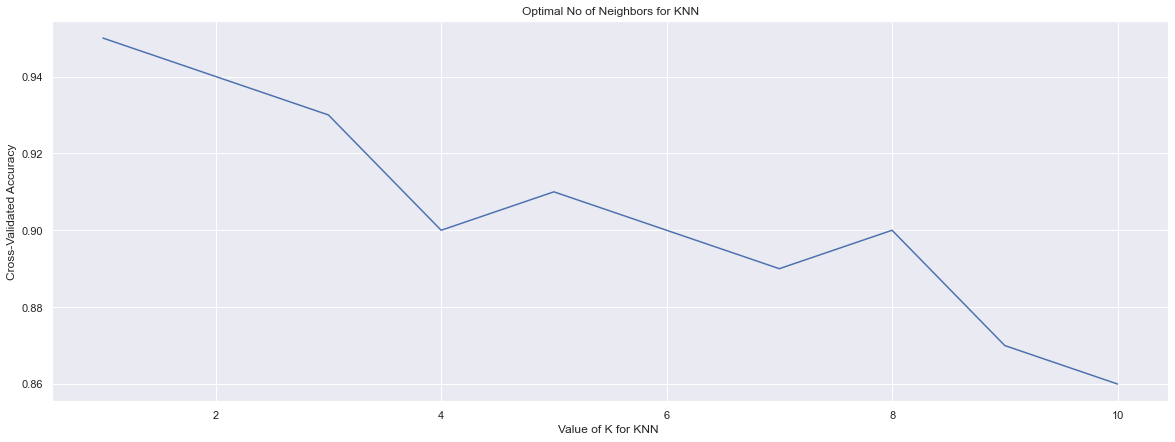

In [20]:
plt.figure(figsize=(20,7))

plt.plot(range(1,11),k_scores)

plt.xlabel('Value of K for KNN ')
plt.ylabel('Cross-Validated Accuracy')

plt.title('Optimal No of Neighbors for KNN')

## KNN Model with k = 1

In [21]:
# KNN model 
knn = KNeighborsClassifier(n_neighbors= 1)

result = cross_val_score(knn,x,y,cv=kfold)

In [22]:
# result of accuracy for 10 Models 
result

array([1. , 1. , 0.9, 1. , 1. , 0.9, 0.9, 0.9, 0.9, 1. ])

In [23]:
print(f'Mean Accuracy of all Models is = {np.round(result.mean(),4)*100}%')

Mean Accuracy of all Models is = 95.0%


In [24]:
# KNN model 
knn_2 = KNeighborsClassifier(n_neighbors= 2)

result_2 = cross_val_score(knn,x,y,cv=kfold)

print(f'Mean Accuracy of all Models is = {np.round(result_2.mean(),4)*100}%')

Mean Accuracy of all Models is = 95.0%
